In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=4,suppress=True)

In [3]:
from __future__ import division

In [4]:
from pandas import Series,DataFrame

In [5]:
datafile='data/powerdata.xls'
data=pd.read_excel(datafile)
print len(data)
data.tail()

291


,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0
290,4,1,0,0


In [6]:
from random import shuffle#防止数据有规律性

In [9]:
data=data.as_matrix()
shuffle(data)

In [20]:
p=0.8
train=data[:int(len(data)*p),:]
test=data[int(len(data)*p):,:]
print len(train),len(test)

232 59


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree=DecisionTreeClassifier()#建立决策树模型
tree.fit(train[:,:3],train[:,3:])#训练学习模型

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
from sklearn.externals import joblib

In [26]:
treefile='data/output/treemodel.pkl'
joblib.dump(tree,treefile)

['data/output/treemodel.pkl']

In [27]:
predict_result=tree.predict(test[:,:3])

In [28]:
print len(predict_result)
predict_result

59


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [29]:
accuracy=tree.score(test[:,:3],test[:,3:])
accuracy

0.9152542372881356

In [31]:
print predict_result
print test[:,3]

[1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0]


In [32]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test[:,3],tree.predict_proba(test[:,:3])[:,1],pos_label=1)

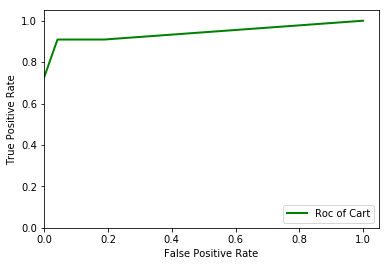

In [34]:
plt.plot(fpr,tpr,linewidth=2,label='Roc of Cart',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
datafile='data/powerdata.xls'
data=pd.read_excel(datafile)

In [39]:
data=data.as_matrix()

In [40]:
shuffle(data)

In [41]:
p=0.8
train=data[:int(len(data)*p)]
test=data[int(len(data)*p):]

In [42]:
clf=MultinomialNB()

In [43]:
clf.fit(train[:,:3],train[:,3])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
predict_result=clf.predict(test[:,:3])

In [45]:
accuracy=clf.score(test[:,:3],test[:,3])
accuracy

0.89830508474576276

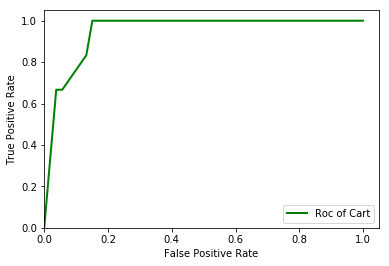

In [46]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test[:,3],tree.predict_proba(test[:,:3])[:,1],pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='Roc of Cart',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()